In [ ]:
# month = monthly_bikeuse['Rent_Date']
# usage = monthly_bikeuse['monthly_cnt']
# #선 그래프를 그린다. x축에는 month, y축에는 usage 표시한다.
# plt.plot(month, usage, color = 'green', marker = 'o', linestyle = 'solid')
# plt.savefig('gdp_per_capita.png', dpi = 600)

In [81]:
import glob 
import pandas as pd
import os
from tqdm import tqdm
import requests
from bs4 import BeautifulSoup as BS 
from tqdm import tqdm
import folium
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc 
import matplotlib.font_manager as fm
import seaborn as sns
import pymysql
import warnings
warnings.filterwarnings('ignore')
con =pymysql.connect(host='ip', user='id', password='pw', db='db', charset='utf8')
cur = con.cursor()

In [ ]:
# CycleRentUse 자전거 데이터 2018~2022 총
# violation_accident 위반유형 - BASE_NAME
# violation_accident_cycle_month 위반유형 월별자저
# accitype_accident 사고유형
# accitype_accident_cycle_month 사고유형 월별자전거
# age_accident 연령대
# age_accident_cycle_month 연령대별 월별자전거
# carexp_accident  운전경력
# carexp_accident_cycle_month 운정경력 월별자전
# hire_point 위도경도
# road_accident 도로형태별 
# road_accident_cycle_month 도로형별 월별자전
# weather_accident 기상상태별
# weather_accident_cycle_month 기상상태별 월별자전


In [43]:
# sql에서 df가져오기
violation_accident = pd.read_sql_query("select * from violation_accident", con=con)
cycleRentUse = pd.read_sql_query("select * from violation_accident", con=con)
violation_accident_cycle_month = pd.read_sql_query("select * from violation_accident_cycle_month", con=con)
accitype_accident = pd.read_sql_query("select * from accitype_accident", con=con)
accitype_accident_cycle_month = pd.read_sql_query("select * from accitype_accident_cycle_month", con=con)
age_accident = pd.read_sql_query("select * from age_accident", con=con)
age_accident_cycle_month = pd.read_sql_query("select * from age_accident_cycle_month", con=con)
carexp_accident = pd.read_sql_query("select * from carexp_accident", con=con)
carexp_accident_cycle_month = pd.read_sql_query("select * from carexp_accident_cycle_month", con=con)
hire_point = pd.read_sql_query("select * from hire_point", con=con)
road_accident = pd.read_sql_query("select * from road_accident", con=con)
road_accident_cycle_month = pd.read_sql_query("select * from road_accident_cycle_month", con=con)
weather_accident = pd.read_sql_query("select * from weather_accident", con=con)
weather_accident_cycle_month = pd.read_sql_query("select * from weather_accident_cycle_month", con=con)

In [82]:
# 어차피 구마다 합계는 같으므로 지자체별로 나누어서 acc_cnt합계 히트맵그리기
violation_accident_group_jijace = violation_accident.groupby(["JIJACE_NM"],as_index=False)[["ACC_CNT"]].sum()
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles="cartodb positron")
geo_str = requests.get("https://t1.daumcdn.net/cfile/tistory/272C224C58B4BD540B").json()
m = folium.Choropleth(geo_str, 
                  data = violation_accident_group_jijace,
                  columns=['JIJACE_NM', 'ACC_CNT'],
                  fill_color="PuRd",
                  key_on="feature.id").add_to(map)
# map

In [ ]:
violation_accident

In [83]:
#BASE_NAME이 위반유형 groupby violation_accident
violation_accident_groupby_base_name = violation_accident.groupby(["BASE_NAME"],as_index=False)[["ACC_CNT"]].sum()
violation_accident_groupby_base_name
# violation_accident_groupby_base_name["BASE_NAME"]

,BASE_NAME,ACC_CNT
0,과속,419
1,교차로운행방법위반,5994
2,기타,6962
3,보행자보호의무위반,6505
4,불법유턴,1301
5,신호위반,21280
6,안전거리미확보,24794
7,안전운전불이행,102170
8,알수없음,78
9,중앙선침범,4822


In [45]:
# FONT가 안되어서 번역
# 과속 - Speeding
# 교차로운행방법위반 - Violation of Intersection Operation Method
# 기타 - Other
# 보행자보호의무위반 - Violation of Duty to Protect Pedestrians
# 불법유턴 - Illegal U-turn
# 신호위반 - Signal Violation
# 안전거리미확보 - Failure to Maintain Safe Distance
# 안전운전불이행 - Failure to Observe Safe Driving Practices
# 알수없음 - Unknown
# 중앙선침범 - Crossing the Centerline
# 직진우회전진행방해 - Obstruction of Straight or Right Turn Traffic
# 차로위반 - Lane Violation

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

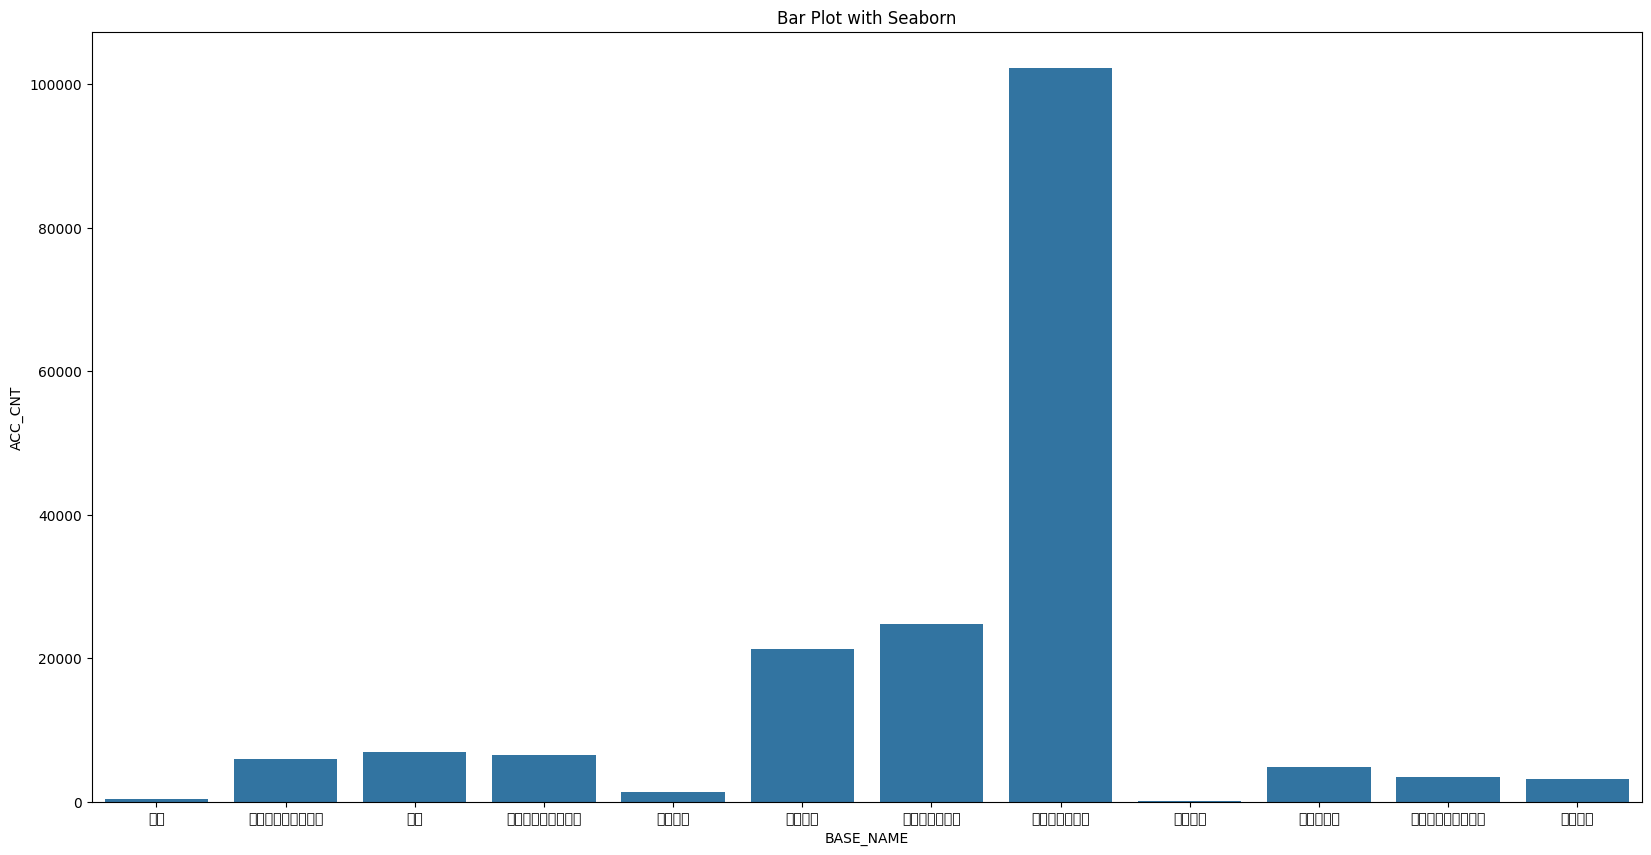

In [91]:
plt.figure(figsize=(20, 10)) 
sns.barplot(x=violation_accident_groupby_base_name["BASE_NAME"], y=violation_accident_groupby_base_name["ACC_CNT"])
plt.title('Bar Plot with Seaborn')
plt.show()